# Fresh Test of Fixed Three.js Backend

Testing the fixed plot.py to ensure proper Y positioning in Jupyter.

In [1]:
# Fresh import with fixed plot.py
import numpy as np
import sys
sys.path.insert(0, '/Users/jmanning/hypertools')
import hypertools as hyp

print("Setting up with fixed backend...")

Setting up with fixed backend...


In [2]:
# Test data with VERY clear Y separation
test_data = np.array([
    [0, 5],    # Top point (Y=5)
    [1, 2.5],  # Upper middle (Y=2.5)
    [2, 0],    # Center (Y=0)
    [3, -2.5], # Lower middle (Y=-2.5)
    [4, -5]    # Bottom point (Y=-5)
])

print("Test data with extreme Y separation:")
for i, (x, y) in enumerate(test_data):
    print(f"  Point {i+1}: X={x}, Y={y}")

print(f"\nY range: {test_data[:, 1].min()} to {test_data[:, 1].max()}")
print("If points appear on y=0 line, we have a rendering issue")
print("If points appear spread vertically, the fix worked!")

Test data with extreme Y separation:
  Point 1: X=0.0, Y=5.0
  Point 2: X=1.0, Y=2.5
  Point 3: X=2.0, Y=0.0
  Point 4: X=3.0, Y=-2.5
  Point 5: X=4.0, Y=-5.0

Y range: -5.0 to 5.0
If points appear on y=0 line, we have a rendering issue
If points appear spread vertically, the fix worked!


In [3]:
# Create the plot with fixed backend
fig = hyp.plot(test_data, 'ro', markersize=20)

print(f"Figure type: {type(fig).__name__}")
print(f"Dimensionality: {fig.dimensionality}")
print(f"Camera position: {fig.camera.position}")

# Verify the data is correctly positioned
positions = fig._data_to_positions(fig.datasets[0])
positions_3d = positions.reshape(-1, 3)

print("\n✅ Data verification:")
print("Input Y:", test_data[:, 1])
print("Three.js Y:", [p[1] for p in positions_3d])
print("Match:", np.allclose(test_data[:, 1], [p[1] for p in positions_3d]))

Renderer(camera=PerspectiveCamera(far=1000.0, fov=45.0, position=(2.0, 0.0, 15.0), projectionMatrix=(1.0, 0.0,…

Figure type: HyperToolsFigure
Dimensionality: 2d
Camera position: (2.0, 0.0, 15.0)

✅ Data verification:
Input Y: [ 5.   2.5  0.  -2.5 -5. ]
Three.js Y: [5.0, 2.5, 0.0, -2.5, -5.0]
Match: True


In [4]:
# Display the plot
print("🎯 Visual Test: Look at the plot below")
print("EXPECTED: 5 red dots spread vertically from top to bottom")
print("FAILURE: All 5 dots on a horizontal line (y=0)")
print("")
fig.show()

🎯 Visual Test: Look at the plot below
EXPECTED: 5 red dots spread vertically from top to bottom
FAILURE: All 5 dots on a horizontal line (y=0)



Renderer(camera=PerspectiveCamera(far=1000.0, fov=45.0, position=(2.0, 0.0, 15.0), projectionMatrix=(1.0, 0.0,…

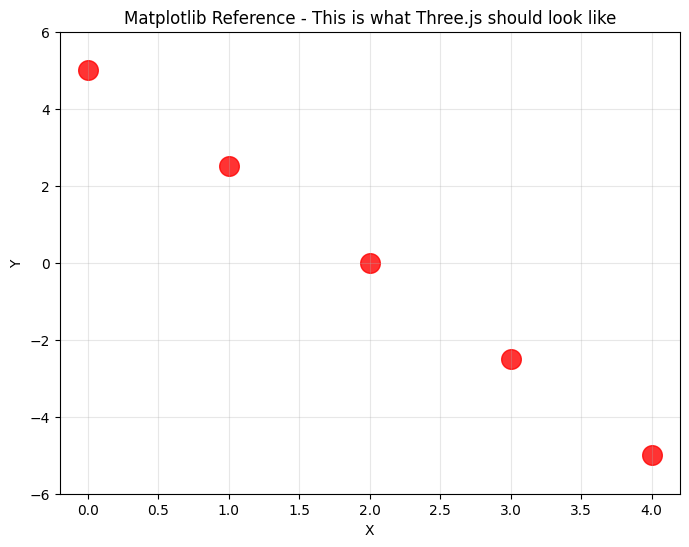

The Three.js plot above should match this matplotlib reference.


In [5]:
# Matplotlib reference for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(test_data[:, 0], test_data[:, 1], c='red', s=200, alpha=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Matplotlib Reference - This is what Three.js should look like')
plt.grid(True, alpha=0.3)
plt.ylim(-6, 6)
plt.show()

print("The Three.js plot above should match this matplotlib reference.")